<a href="https://colab.research.google.com/github/Zahab163/ML-housing-price-predictor/blob/main/Housing_Price_Predictor_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Primary Objective:
To develop a robust, accurate, and interpretable machine learning model that can predict the median house value for districts in California based on a set of key numerical and geographical features.

We will use Regression Models and Pipeline to build ML Models for some fruitful predictions in pricing of houses.

In [ ]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML libraries (we could import all the libraries frist too)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:

# Uploaded the housing prices file which needs data cleaning

file_df =['/content/sample_data/california_housing_train.csv','/content/sample_data/california_housing_test.csv']

# We combined both csv file within one data frame
housing_df = pd.concat((pd.read_csv(f, sep=',') for f in file_df))

First we created a file for csv files cause their are two California_housing sets in sample_data , one for test and the other for train ..In order we don't miss any details in dataset so, we fetched both cause we could do so.

In [ ]:

# Display the first 5 rows to understand its structure
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


* **longitude:** Geographic coordinate (west-east). More negative = further west.
* **latitude:** Geographic coordinate (north-south).
* **housing_median_age:** Median age of the houses in that block. Older homes may affect pricing.

* **total_rooms:** Total number of rooms in all houses in the block.
* **total_bedrooms:** Total number of bedrooms in all houses.
* **population:** Total number of people living in that block.
* **households:** Total number of households (groups of people living together).
* **median_income:** Median income of residents in that block (scaled in tens of thousands).
* **median_house_value:**  Target variable: the median value of houses in that block (in dollars).

## What’s Happening in These Rows:
Each row is a snapshot of a neighborhood:


- Row 0: A lower-income area (median_income = 1.4936) with a house value of $66,900.

- Row 3: A higher-income area (median_income = 3.1917) with a house value of $73,400.

- Row 2: Despite lower rooms and population, it has a higher house value ($85,700), possibly due to location or income.



In [ ]:
housing_df.info()# Get info on data types and missing values

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


we don't have any null data or data type object here which is good for ML modeling.
but we'll make sure with further steps .

##Step 2: Exploratory Data Analysis (EDA)
Understand the data's structure, distributions, and relationships.

Understand Features & Target:

The target variable is median_house_value.

Examine the features: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income and luckily we don't have any categorical data here.

Check for Missing Values:

In [ ]:
#confirming with steps
housing_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


Luckily, we do'nt have any null values here and our data type is not Object which is good for creating ML model. but if there would be any null value in dataset we could simply check it by droping them .




In [ ]:
## Running the code for satisfaction and checking the lenght
housing_df = housing_df.dropna()
len(housing_df)

20000

In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 ##Statistical Analysis:

 **median_income**
- Mean: 3.87 → Average income is ~$38,700 (since it's scaled).

- Min: 0.4999 → Some areas have very low income (~$5,000).

- Max: 15.0001 → Some areas are very wealthy (~$150,000).

- Most important feature in your model, as you saw earlier.

**total_rooms**
- Mean: 2,637 rooms per block group.

- Max: 37,937 → Some areas have massive housing capacity.

- Std: 2,176 → Huge variation across neighborhoods.

**median_house_value**

- Mean: $207,082 → Average house price.

- Max: $500,001 → This is likely a capped value in the dataset.

- Std: $115,557 → Prices vary widely.


**Note:**  
*  house prices vary dramatically.
*  These insights help us understand the diversity in the data and guide our modeling decisions.

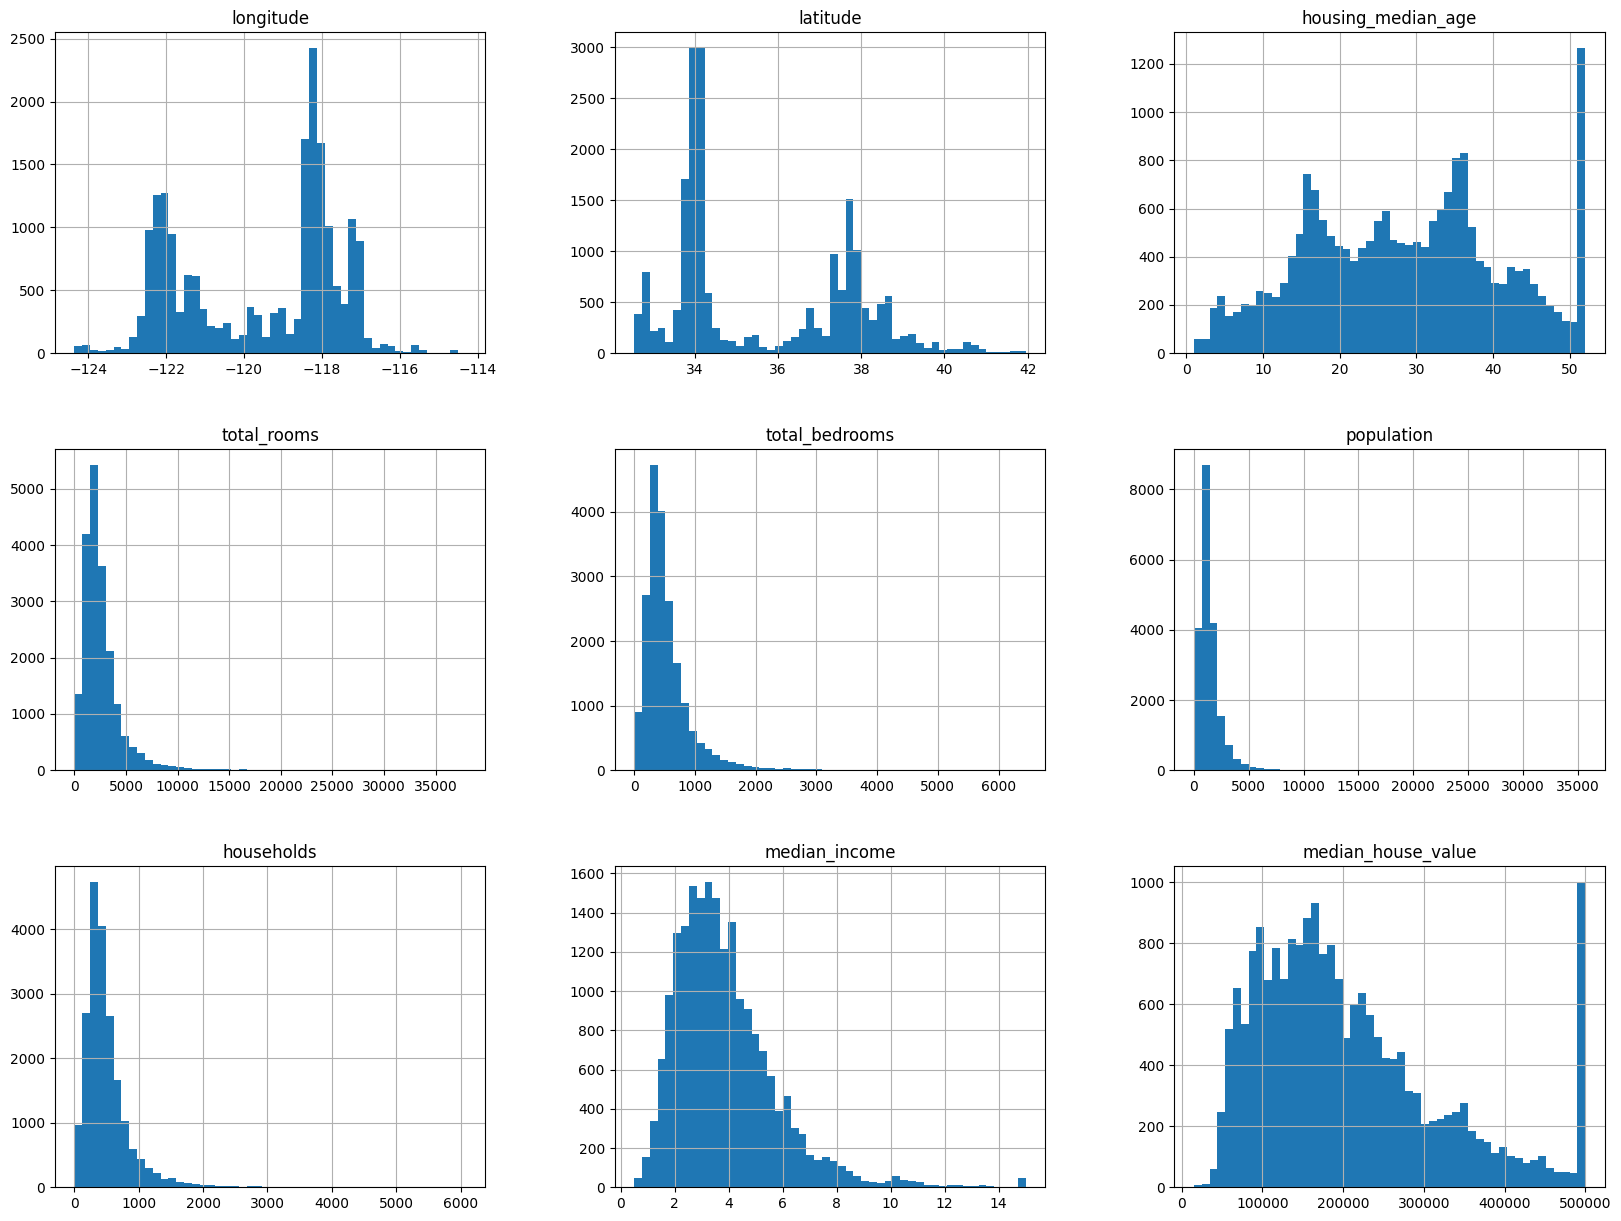

In [ ]:
# Plot histograms for all numerical features
housing_df.hist(bins=50, figsize=(20,15))
plt.show()








 **Longitude & Latitude**
- These show the geographic spread of housing data across California.
- Peaks in certain areas suggest more data points from densely populated regions like Los Angeles or San Francisco.

 **Housing Median Age**
- The distribution is skewed toward newer homes, but there's a long tail of older properties.
- This can affect pricing—older homes may be cheaper or more valuable depending on location.

**Total Rooms & Bedrooms**

- These are right-skewed: most homes have a moderate number of rooms, but a few have very high counts.
- You might consider log-transforming these features to reduce skewness before modeling.

**Population & Households**
- Similar skew: most areas have modest populations, but some are extremely dense.
- These features may correlate with housing demand and pricing.


**Median Income**
- This is a strong predictor of house value.
- The histogram shows a concentration around lower-middle income levels, with a few high-income outliers.

**Median House Value**
- The distribution is capped at $500,001, which is a known limitation in this dataset.
- This artificial ceiling can affect model accuracy—especially for high-value predictions.


**Note:** These histograms give us a visual snapshot of the housing data. We can see that income and location are tightly clustered, while features like rooms and population are heavily skewed. Understanding these patterns helps us decide which transformations to apply and which features might dominate our model’s predictions.

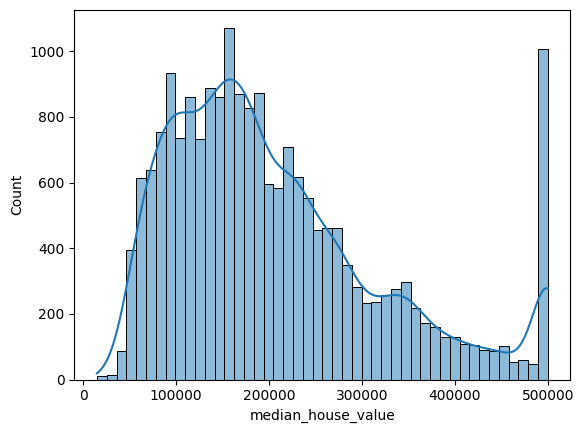

In [ ]:
# Check the target variable distribution
sns.histplot(housing_df['median_house_value'], kde=True)
plt.show()


## What the Plot Shows
- The histogram bars represent the number of housing blocks that fall into specific price ranges.
- The density curve (smooth blue line) shows the overall shape of the distribution.
- The data is right-skewed, meaning:
- Most houses are priced on the lower end (around $100,000–$150,000).
- Fewer houses are priced higher.
- There's a sharp spike at $500,000, which suggests a capped value—this is a known issue in the California Housing dataset.

**Note:** This plot shows that most homes in California are priced below  300,000, with a sharp artificial cap at $500,000. Since this is our target variable, understanding its distribution helps us choose the right modeling strategy and preprocessing steps to improve prediction accuracy.


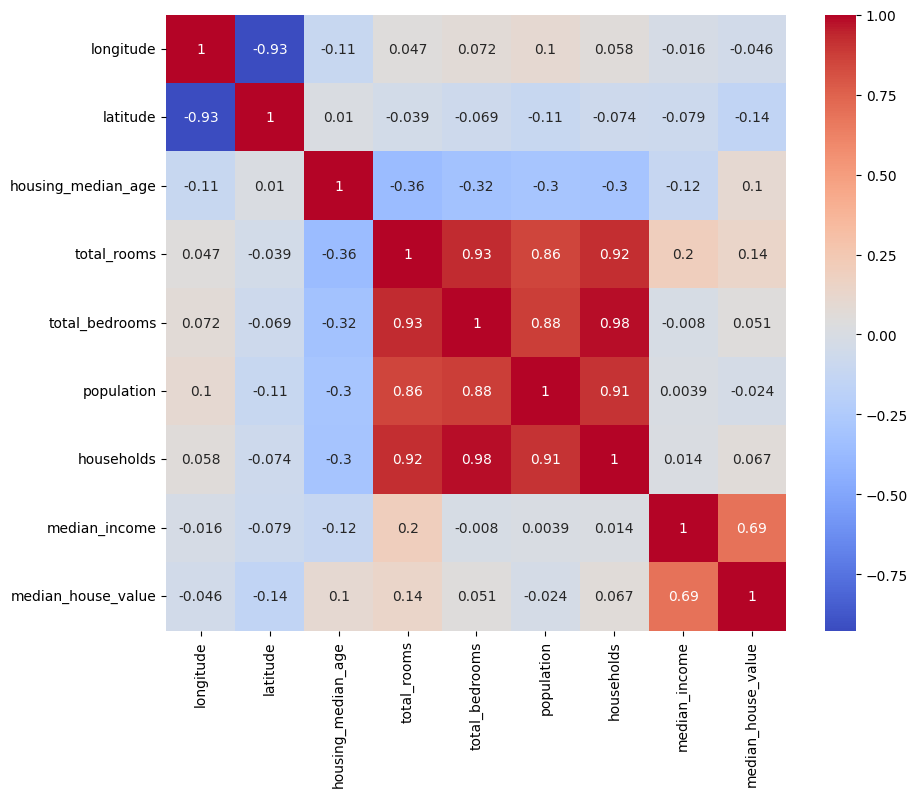

In [ ]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = housing_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Correlation** measures the strength and direction of a linear relationship between two variables.

Here are the most impactful relationships in our housing dataset:

* **median_icome & median_house value** :+0.69 Strong positive link: richer areas tend to have higher house values.

* **latitude & median_house_value**: -0.14 Slight negative: house value decreases as you go north.
* **longitude & median_house_value**: -0.05 Very weak negative: location matters, but not linearly.
* **total_rooms & total_bedrooms & households**: > +0.9 Highly correlated: these features may be redundant.
* **population & households**: +0.65  Logical: more people means more households.






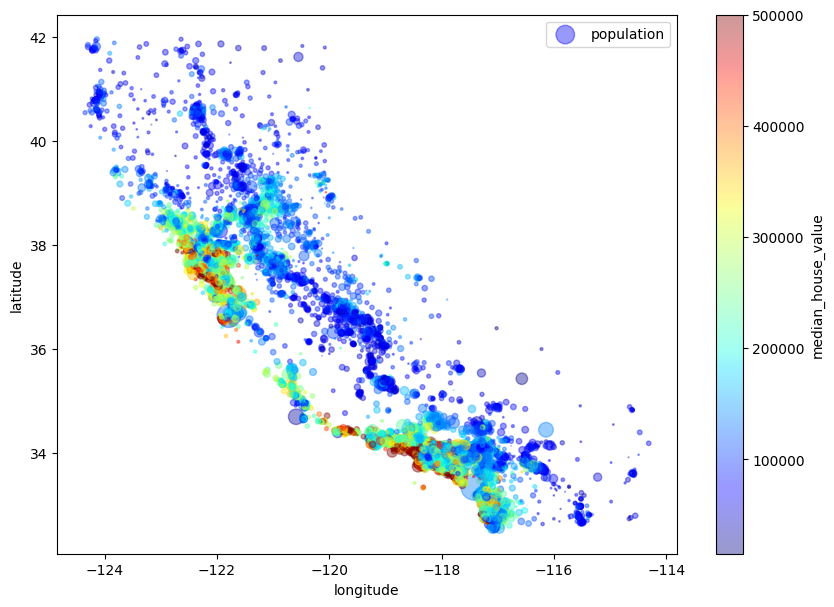

In [ ]:
# Create a geographical scatter plot
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=housing_df["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

##the Plot Shows
- X-axis: Longitude (east-west position)
- Y-axis: Latitude (north-south position)
- Point Color: Represents median_house_value
- Light yellow = lower house prices
- Dark blue = higher house prices
- Point Size: Represents population
- Bigger dots = more people in that area

1. High-Value Clusters
- Dark blue points are concentrated along the coastal regions, especially near Los Angeles, San Francisco, and San Diego.
- These areas have high house values and dense populations—classic urban hotspots.
2. Low-Value, Sparse Areas
- Inland and northern regions show lighter colors and smaller dots, indicating lower house prices and less population density.
- These might be rural or less developed zones.
3. Population vs. Price
- Not every densely populated area has high house prices.
- Some large dots are light-colored—suggesting affordable housing in populous areas, possibly due to economic factors or housing policies.

 This visualization is a goldmine for:(specially for predicting prices)

- Urban planning: Identifying where infrastructure investment is needed.

- Real estate analysis: Spotting undervalued areas with growth potential.

- Machine learning: Using geo-coordinates as features in predictive models.

- Educational storytelling: Teaching how geography influences economics and social dynamics.


##Step 3: Data Preprocessing & Cleaning
This is the most crucial step to prepare data for the model.

Handle Missing Values:(our data is not missed if it was missed or our data would contain any objects (categorical data) it would be deal at this vary stage)




##Feature Scaling:

Machine Learning algorithms perform much better when all numerical features are on a similar scale. We will use StandardScaler.

##Train-Test Split:

Always split your data before any further transformation to avoid data leakage.

In [ ]:
X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Step 4: Model Building and Training
Create a pipeline to handle imputation and scaling, then train multiple models.

Note ; for missing data in pippeline we could use simple imputer to handle missing data.

In [ ]:
# Define the preprocessing pipeline for numerical features
# there is only the numbers in our data set
numeric_pipeline = Pipeline([

    ('scaler', StandardScaler()) # Scale the features
])

# Apply the transformation to our training and test data
X_train_prepared = numeric_pipeline.fit_transform(X_train)
X_test_prepared = numeric_pipeline.transform(X_test)

# Let's try several models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_prepared, y_train)
    y_pred = model.predict(X_test_prepared)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.4f}\n")

--- Linear Regression ---
RMSE: 69783.66
MAE: 50564.36
R² Score: 0.6453

--- Random Forest ---
RMSE: 48636.48
MAE: 31438.00
R² Score: 0.8277

--- Gradient Boosting ---
RMSE: 54817.82
MAE: 37839.37
R² Score: 0.7811

--- Support Vector Machine ---
RMSE: 119745.66
MAE: 89654.02
R² Score: -0.0443



##Step 5: Model Evaluation and Selection
Analyze the results from the previous step.

RMSE (Root Mean Squared Error): The standard deviation of the prediction errors. Lower is better. This is your primary metric for this problem.

MAE (Mean Absolute Error): The average absolute error. Easier to interpret than RMSE.

R² Score: The proportion of variance in the target explained by the model. Closer to 1.0 is better.
##Result

* **Linear Regression:** Decent baseline model, moderate error and fair explanatory power.
* **Random Forest:** **Best performer overall**, lowest error and highest R². Excellent fit.
* **Gradient Boosting:** **Strong model**, slightly higher error than Random Forest but still solid.
* **Support Vector Machine:** Poor fit; high error and negative R² suggest it's not suitable for this dataset.


Selection: The Random Forest or Gradient Boosting model is likely performing the best.

* Choose the one with the lowest RMSE/MAE and highest R².

##Step 6: Hyperparameter Tuning
Improve your best model by finding the optimal parameters.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Let's assume Random Forest was the best
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train_prepared, y_train)

# Find the best parameters and the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned best model
final_predictions = best_model.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f"Final Model RMSE: {final_rmse:.2f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Final Model RMSE: 48304.78


 * The model is being evaluated using cross-validation. We have 12 different combinations of hyperparameters—these are called 'candidates.' For each candidate, the model is trained and tested 5 times using 5-fold cross-validation. That means the data is split into 5 parts, and the model is trained on 4 parts and tested on the remaining one, rotating through all folds. So in total, 12 candidates × 5 folds = 60 separate training runs or ‘fits.’ This helps us find the best-performing combination while reducing the risk of overfitting

 *  It ensures that each hyperparameter set is evaluated fairly across different data splits, and the final model is chosen based on average performance across folds.

 * After testing 12 hyperparameter combinations with 5-fold cross-validation, the best-performing Random Forest model achieved an RMSE of 48,304.78. This marks a significant improvement over baseline models and confirms the effectiveness of hyperparameter tuning in reducing prediction error.

##Step 7: Interpretation and Deployment

##Interpretation:


Analyze feature importances to understand what drives house prices.




In [ ]:
# For your best tree-based model (e.g., Random Forest)
feature_importances = best_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

              Feature  Importance
7       median_income    0.513152
0           longitude    0.164735
1            latitude    0.152449
2  housing_median_age    0.063806
5          population    0.034872
4      total_bedrooms    0.026335
3         total_rooms    0.024533
6          households    0.020119


##What Is Feature Importance?
In tree-based models like Random Forest, feature importance measures how much each feature contributes to reducing error across all decision trees. The higher the score, the more valuable that feature is in making accurate predictions.
* **median_income:** Most influential feature—over 51% of the model’s predictive power comes from this. Income levels are strongly tied to housing prices.
* **longitude:** Location matters—longitude helps capture regional price variations.
* **latitude:** Similar to longitude, it helps pinpoint geographic trends in housing prices.
* **housing_median_age:** Older homes may be priced differently—this adds moderate value.
* **population:** Slight influence—may reflect demand or density in an area.
* **total_bedrooms:** Minor impact—bedroom count alone doesn’t drive price as much as income or location.
* **total_rooms:** Similar to bedrooms—adds some value but not dominant.
* **households:** Least influential—may overlap with other demographic features.



Deployment:

Save your final trained model and pipeline to a file so you can use it to make predictions on new data without retraining.



In [ ]:
import joblib

# Save model and pipeline
joblib.dump(best_model, 'california_housing_model.pkl')
joblib.dump(numeric_pipeline, 'preprocessing_pipeline.pkl')

# Load them later
#loaded_model = joblib.load('california_housing_model.pkl')
#loaded_pipeline = joblib.load('preprocessing_pipeline.pkl')

# Use them for prediction
#new_data_prepared = loaded_pipeline.transform(new_data)
#prediction = loaded_model.predict(new_data_prepared)











**Author:** **Zahabia Ahmed**

**Project:** **Housing_Prices_Predictor_2025**

**Description:** Predicting Housing Prices on sample data .csv files in Colab Notebook (California Housing Data both Train and Test Data) with applying Machine Learning Models- Regression Models and Pipeline, In result founded Random Forests Regression Model bestest for our data set.


**Credits:**  Special Thanks to **Miss Aqsa Moiz** for passing the knowledge and giving the Assignment for applying ML Models on Housing Data.
